# Popular Data Science Questions on StackExchange

## Introduction
In this scenario, we'll pretend to be working for a company that creates data science content (e.g. books, online articles, videos, etc.). We're tasked with figuring out what is best content to write about. From prior experience, we know that given the lack of concrete instructions there's some leeway in what "best" means here.

Passionate about helping people learn, we decide to scower the internet in search for the answer to the question "What is it that people want to learn about in data science?" (as opposed to determining the most profitable content, for instance). 
Thinking back to your experience when you first started learning programming, it occurs to you that if you wanted to figure out what programming content to write, you could consult Stack Overflow (a question and answer website about programming) and see what kind of content is more popular.

### Exploration

Lets start by looking over the [Data Science StackExchange page](https://datascience.stackexchange.com/) home page.

The 'Home' page is subdivided into 5 other sections: `Questions`, `Tags`, `Users,`, `Jobs`, and `Unanswered`.
- Questions: A list of all recently submitted questions to the site.
- Tags: A list of keywords/labels that categorize questions into groups of questions concerning similar topics. For example: `machine-learning`, `python`, `deep-learning`, etc.
- Users: A sort of 'leaderboard' for question answerers active on the exchange.
- Jobs: An external link to SO's job board.
- Unanswered: A list of questions with no upvoted/accepted responses.

Of these pages, `Tags` seem by far the most relevant to answering our questions. We can use this tagging system to help identify the types of questions asked and quantify which questions are asked most frequently on the site. Furthermore, given Stack Exchange's robust moderation by it's communities, we can be reasonably confident in the accuracy of these tags. 

[This page](https://datascience.stackexchange.com/help/on-topic) details types of questions suited for DSSE:
1. Question should not be duplicated, either on DSSE or another exchange.
2. Questions are most appropriate for DSSE if they are concerned with putting statistical concepts into practice, focus on implementation and (business) processes. 
3. Theoretical questions are better suited to other exchanges (specifically Cross Validated or Stack Overflow)
4. Questions should be specific, as widely relevant as possible, and be as objective as possible.

Other relevant exchanges are listed:
- [Open Data](https://opendata.stackexchange.com/help/on-topic): Requests for data sets.
- [AI](https://ai.stackexchange.com/help/on-topic): Theory and social impact of artifical intelligence.
- [Computational Science](https://scicomp.stackexchange.com/help/on-topic): Computational methods in technical disciplines.

#### Information that is presented with a post
Each post is divided into a `question`, followed by a list of potential `answers`. Common elements between the two include: `title`, `score`, `author`, `timestamp`, and `body`. However, questions also have a list of `tags` associated with them, as well as a list of `related` questions. On the other hand, a single answer may be flagged as `accepted`, indicating the "best" response (as selected by the question author).

#### DSSE and the Stack Exchange Data Explorer
Stack Exchange maintains an open source tool called the [Stack Exchange Data Explorer](https://data.stackexchange.com/help) which facilitates querying public-facing data hosted within the Stack Exchange network. This allows us to investigate some of the tables representing DSSE's data in order to better determine what types of questions are more popular. To boot, it even allows ad-hoc querying!

Looking over the DB schema, a few tables catch our interest right away:
1. `Posts`: 
    - `Id`: Unique identifier for post
    - `PostTypeId`: type of this post (questions are posts with `PostTypeId = 1`)
    - `CreationDate`: when the post was made
    - `LastActivityDate`: a timestamp of when the post was most recently active
    - `Score`: number of upvotes a post has recieved (indicating interest or popularity)
    - `ViewCount`: another representation of popularity
    - `FavoriteCount`: number of times the post was "favorited" (indicating interest)
    - `AnswerCount`: number of answers submitted to the post (questions only)
    - `Tags`: a list of tags associated with the post's content
2. `Tags`:
    - `TagName`: string label of tag
    - `Count`: number of times the tag is used on DSSE
3. `TagSynonyms`:
    - `SourceTagName`: what the tag is aliased from
    - `TargetTagName`: what the tag is aliased to
    - `AutoRenameCount`: number of times the source tag has been auto-renamed to the target tag

At first glance, it seemed like the `Tags` and `TagSynonymns` tables might be of interest, but they do not contain any historical information about each tag's usage-- meaning that they can only tell us about the popularity of each tag since the DSSE's inception. While still interesting in it's own right, this doesn't help us determine what topics are of interest on DSSE in the present (or at least recently).

| Id | TagName | Count |
|---|---|---|
|2|machine-learning|7935|
|46|python|4646|
|81|neural-network|3328|
|194|deep-learning|3237|
|77|classification|2205|
|324|keras|2077|
|128|scikit-learn|1561|
|321|tensorflow|1491|
|47|nlp|1404|
|24|r|1227|
|72|time-series|1176|
|61|dataset|1045|
|157|regression|1037|
|5|data-mining|1012|
|15|clustering|1006|
|557|cnn|982|
|168|predictive-modeling|904|
|64|pandas|897|
|527|lstm|832|
|27|statistics|755|

Fortunately the `Posts` table is robust with many useful columns, in particular `Score`, `Tags`, and `CreationDate`. With some work we should be able to get an idea of what topics were relevant to any period of time-- including today!

`PostTypeId` indentifies which of the 8 post types a given post belongs to:

|Id|Name|
|---|---|
|1|Question|
|2|Answer|
|3|Wiki|
|4|TagWikiExcerpt|
|5|TagWiki|
|6|ModeratorNomination|
|7|WikiPlaceholder|
|8|PrivilegeWiki|

We can take a look at the distribution of post types with:
```
SELECT PostTypeId, COUNT(*) as n_posts
  FROM posts
 GROUP BY PostTypeId;
```
|PostTypeId|n_posts|
|---|---|
|1|25322|
|2|28006|
|4|239|
|5|239|
|6|11|
|7|1|

This lets us know that we can focus our attention on `Question` and `Answer` posts without problems. Even if one of the other `PostTypes` happens to be disproportionately popular, it would certainly have to be an outlier-- and as a result not of relevance to our analysis.

### Obtaining the Data

We can get the data we're interested in for 2019 from the `Posts`  table with the following query:

```
SELECT
      Id,
      PostTypeId,
      CreationDate,
      Score,
      ViewCount,
      FavoriteCount,
      AnswerCount,
      Tags
  FROM Posts
 WHERE PostTypeId=1 AND YEAR(CreationDate)=2019;
```

The first few rows returned look like

|Id|PostTypeId|CreationDate|Score|ViewCount|FavoriteCount|AnswerCount|Tags|
|---|---|---|---|---|---|---|---|
|58494|1|2019-09-01 07:35:22|1|17|2|1|<sampling><variance>|
|58496|1|2019-09-01 07:49:28|1|48||0|<python><keras><scikit-learn><numpy><reshape>|
|58498|1|2019-09-01 10:25:22|0|32||1|<linear-regression>|
|58503|1|2019-09-01 12:27:43|0|12||0|<time-series><dataset><forecasting>|
|58505|1|2019-09-01 15:17:11|0|12|1|0|<machine-learning><deep-learning><dataset>|
|58506|1|2019-09-01 15:51:10|0|194||1|<machine-learning><deep-learning><keras><cross-validation><accuracy>|
    
The Data Explorer allows us to export these results and download them locally in CSV format.

### Early Data Exploration

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
questions = pd.read_csv('2019_questions.csv', parse_dates=["CreationDate"])
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null datetime64[ns]
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    1407 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 483.5+ KB


Right away we can tell that the `FavoriteCount` column is the only column missing values, and it's missing a whopping 88% of it's entries. However, we can reasonably guess that a missing value in this column indicates that the question is not present on any user's favorite list. As a result, we'll fill the `Null` values with zero. At the same time, we'll convert the data type for this column to a more accurate integer format.

The `object` dtype for the `Tags` column suggests the data is being stored as strings, but we should confirm this.

In [3]:
print("Unique data types of tag values: {}".format(questions["Tags"].apply(lambda val: type(val)).unique()))
print("A sample tag list: {}".format(questions["Tags"].iloc[0]))

Unique data types of tag values: [<class 'str'>]
A sample tag list: <machine-learning><data-mining>


`Tags` are being stored as strings. From the example pulled we can also see that each post may have multiple tags associated with it. This is being represented by a list of tags delimited by sets of `<>` characters. This format is pretty unwieldy to analyze with standard string operations, so we'll need to come up with a solution to separate the tags.

### Data Cleaning

In [4]:
questions["FavoriteCount"] = questions["FavoriteCount"].fillna(0).astype('int64')
questions["Tags"] = questions["Tags"].str.replace('^<|>$','').str.split('><')

In [5]:
questions.info()
questions.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null datetime64[ns]
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    8839 non-null int64
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 483.5+ KB


,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
8487,55359,2019-07-09 11:18:53,0,480,"[label-smoothing, label-flipping]",1,1
5041,51422,2019-05-05 09:21:05,0,30,"[machine-learning, svm]",1,0
995,45556,2019-02-14 05:47:46,1,30,"[machine-learning, gradient-descent]",1,0
5013,62433,2019-10-30 19:04:23,0,27,"[convnet, pytorch, gan, generative-models, gau...",1,0
4134,49610,2019-04-19 19:26:06,0,105,"[scikit-learn, nlp, clustering, unsupervised-l...",0,0


### Most popular tags

In [29]:
tag_count = dict()
view_count = dict()

def tags_and_views(row):
    """
    Processes and counts number of times a tag is used for posts and the number of times those tags are viewed.
    """
    for tag in row["Tags"]:
        tag_count[tag] = 1 if not tag_count.get(tag,0) else tag_count[tag]+1
        view_count[tag] = row["ViewCount"] if not view_count.get(tag,0) else view_count[tag]+row["ViewCount"]
        
    return None

_ = questions.apply(tags_and_views, axis=1)
tag_info = pd.DataFrame({'tag_count':tag_count, 'view_count':view_count})
tag_info.describe()

,tag_count,view_count
count,526.000000,526.000000
mean,50.646388,8981.285171
std,176.976222,36737.045709
min,1.000000,4.000000
25%,3.000000,153.500000
50%,9.000000,846.000000
75%,33.500000,4996.000000
max,2693.000000,537585.000000


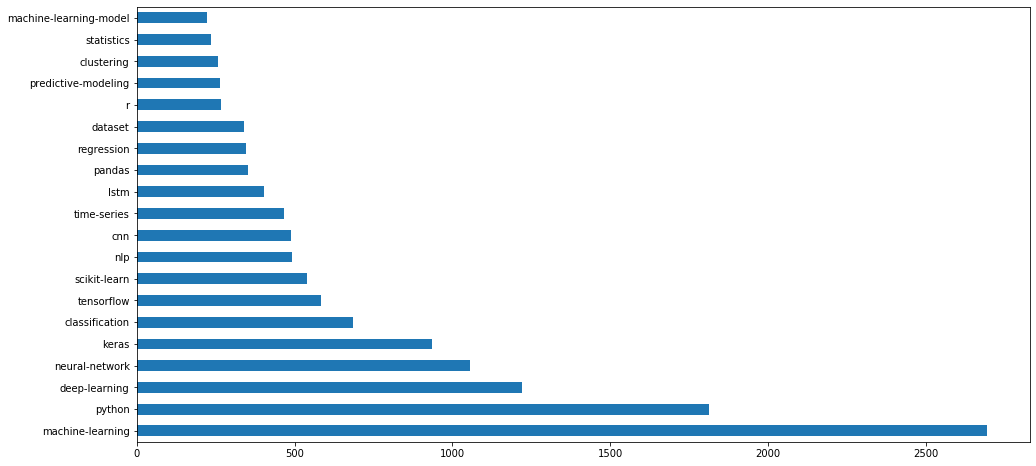

In [39]:
tags_sorted = tag_info["tag_count"].sort_values(ascending=False)
tags_sorted.head(20).plot(kind="barh", figsize=(16,8))

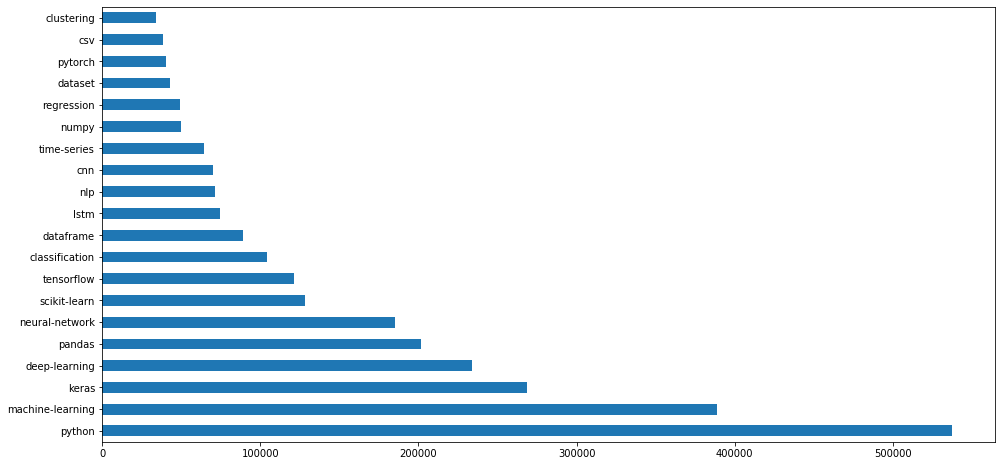

In [40]:
views_sorted = tag_info["view_count"].sort_values(ascending=False)
views_sorted.head(20).plot(kind="barh", figsize=(16,8))

Some of the tags used on the exchange are very broad or lack specificity (e.g. `python`, `machine-learning`, `dataframe`) which means they will be of little use in determining how to direct our content. Fortunately we do observe some more targeted tags like `deep-learning`, `classification`, or `time-series` which each refer to a specific subject matter we could elect to produce content about.


In [41]:
common_tags = pd.merge(tags_sorted.head(20), views_sorted.head(20), how="left", left_index=True, right_index=True)
common_views = pd.merge(tags_sorted.head(20), views_sorted.head(20), how="right", left_index=True, right_index=True)

### Most common tag correlation heatmap

In [44]:
top_tags = tags_sorted.head(20)
associations = pd.DataFrame(data=0, index=tag_info.index, columns=tag_info.index)
for tags in questions["Tags"]:
    associations.loc[tags, tags] += 1

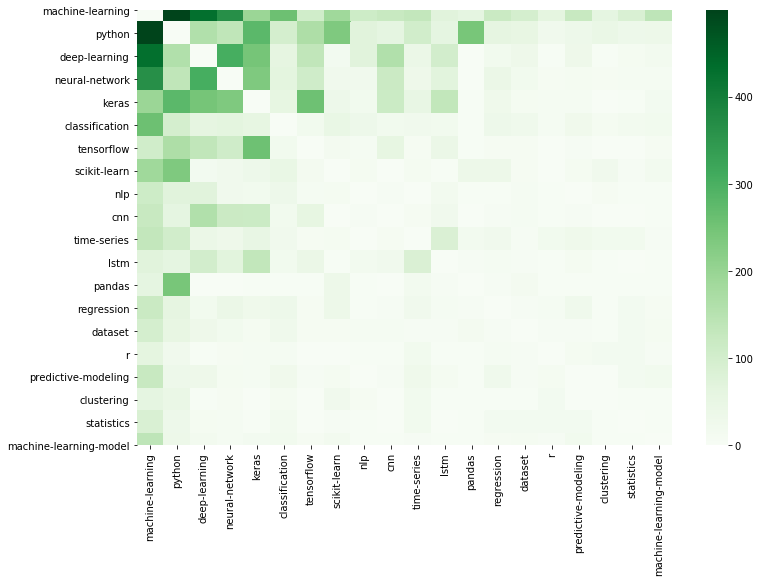

In [53]:
top_tag_assoc = associations.loc[top_tags.index, top_tags.index]
np.fill_diagonal(top_tag_assoc.values, 0) # set diagonal values to 0 to mitigate trivial auto-correlation
plt.figure(figsize=(12,8))
sns.heatmap(top_tag_assoc, cmap="Greens", annot=False)

From the heatmap we can determine that the most popular tags (here towards the top-left of the figure) are also most frequently presented together. Note, however, that this figure is not a true correlation matrix, and nor does not imply that these tags are necessarily related. However, they do give us some general insight from which to further investigate.

In particular, amongst the top tags we know that `deep-learning`, `neural-network`, `keras`, and `tensorflow` are related because `keras` and `tensorflow` are both popular python frameworks for implementing `neural-network`s which themselves form the basic structure behind `deep-learning`. Thus we start to suspect that `deep-learning` might be a good topic for content production.

### Tracking `deep-learning` tags over time

In [57]:
all_questions = pd.read_csv("all_questions.csv", parse_dates=["CreationDate"])
all_questions["Tags"] = all_questions["Tags"].str.replace('^<|>$','').str.split('><')